In [90]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import pandas as pd
import time
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [91]:
data = pd.read_csv('train.csv')
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [92]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [93]:
data.loc[(data['Working Professional or Student'] == 'Student') & (data['Profession'].isna()), 'Profession'] = 'Student'

In [94]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2           Student                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [95]:
data['Pressure'] = data['Academic Pressure'].combine_first(data['Work Pressure'])

data = data.drop(columns=['Academic Pressure', 'Work Pressure'])

In [96]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Study Satisfaction  Job Satisfaction  \
0              Chef   NaN                 NaN               2.0   
1           Teacher   NaN                 NaN               3.0   
2           Student  8.97                 2.0               NaN   
3           Teacher   NaN                 NaN               1.0   
4  Business Analyst   NaN                 NaN               1.0   

      Sleep Duration Dietary Habits   Degree  \
0  More than 8 hours        Healthy      BHM   
1  Less than 5 hours      Unhealthy      LLB   
2          5-6 hours        Healthy  B.Pharm   
3  Less than 5 hours       Moderate      BBA   
4          5-6 hours      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  
0                               No           0       5.0  
1                               No           1       4.0  
2                               No           1       5.0  
3                              Yes           1       5.0  
4                              Yes           0       1.0

In [97]:
print(data['Sleep Duration'].value_counts())
data['Sleep Duration'] = data['Sleep Duration'].replace({
'Less than 5 hours': 4,
'5-6 hours': 5.5,
'7-8 hours': 7.5,
'More than 8 hours': 9,
'1-2 hours': 2,
'2-3 hours': 3,
'3-4 hours': 4,
'4-5 hours': 4.5,
'4-6 hours': 5,
'5-6 hours': 5.5,
'6-7 hours': 6.5,
'6-8 hours': 7,
'7-8 hours': 7.5,
'8-9 hours': 8.5,
'9-11 hours': 10,
'10-11 hours': 10.5,
'40-45 hours': None,
'45': None,
'45-48 hours': None,
'49 hours': None,
'55-66 hours': None,
'1-3 hours': 3,
'1-6 hours': None,
'3-6 hours': 5,
'8 hours': 8,
'9-5': 7,
'9-5 hours': 7,
'9-6 hours': 7.5,
'Indore': None,
'Moderate': None,
'Pune': None,
'Sleep_Duration': None,
'Unhealthy': None,
'Work_Study_Hours': None,
'No': None,
'35-36 hours':None,
'10-6 hours':8,
'than 5 hours':5
}
)

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

/tmp/ipykernel_299/1642088292.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [98]:
data['Satisfaction'] = data['Study Satisfaction'].combine_first(data['Job Satisfaction'])

data = data.drop(columns=['Job Satisfaction', 'Study Satisfaction'])

In [99]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0              Chef   NaN             9.0        Healthy      BHM   
1           Teacher   NaN             4.0      Unhealthy      LLB   
2           Student  8.97             5.5        Healthy  B.Pharm   
3           Teacher   NaN             4.0       Moderate      BBA   
4  Business Analyst   NaN             5.5      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                               No           0       5.0           2.0  
1                               No           1       4.0           3.0  
2                               No           1       5.0           2.0  
3                              Yes           1       5.0           1.0  
4                              Yes           0       1.0           1.0

In [100]:
data.shape

(140700, 18)

In [101]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
CGPA                                     112802
Sleep Duration                               23
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [102]:
data['Profession'] = data['Profession'].fillna('Unknown')

In [103]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
CGPA                                     112802
Sleep Duration                               23
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [104]:
count_working_professional = (data['Working Professional or Student'] == 'Working Professional').sum()
count_Students = (data['Working Professional or Student'] == 'Student').sum()

print("Count of 'Working Professional':", count_working_professional)
print("Count of 'Students':", count_Students)

Count of 'Working Professional': 112799
Count of 'Students': 27901


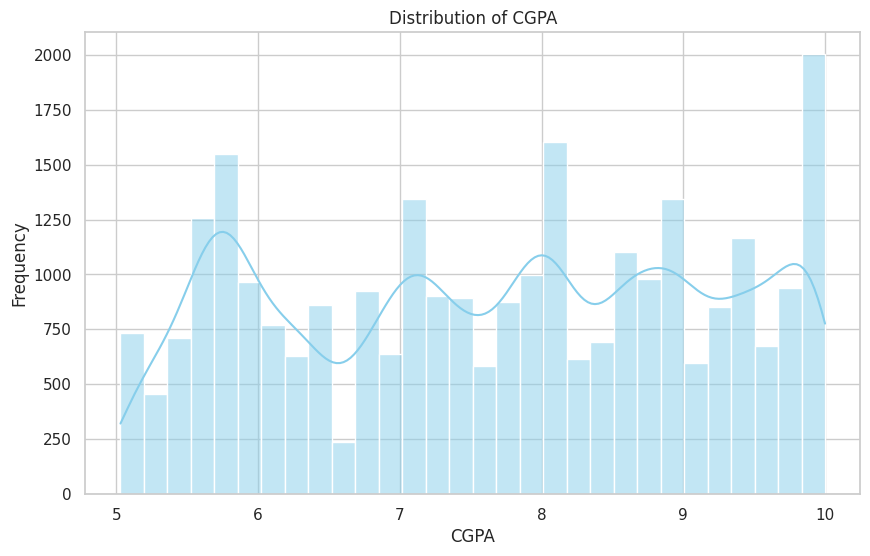

In [105]:
cgpa_data = data['CGPA'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(cgpa_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.show()

In [106]:
median_cgpa = data['CGPA'].median()

In [107]:
data['CGPA'] = data.apply(lambda row: -1 if row['Working Professional or Student'] == "Working Professional" else row['CGPA'], axis=1)

In [108]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      9
Sleep Duration                           23
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


In [109]:
cgpa_null_rows = data[data['CGPA'].isnull()]

print("Rows where CGPA is NULL:")
print(cgpa_null_rows)

Rows where CGPA is NULL:
            id      Name  Gender   Age       City  \
21880    21880    Aarush    Male  38.0    Chennai   
52737    52737     Aarav    Male  28.0   Vadodara   
58062    58062    Ishita  Female  32.0   Vadodara   
70453    70453      Veda  Female  20.0  Ahmedabad   
75007    75007     Aarav    Male  21.0    Lucknow   
105773  105773     Anand    Male  18.0  Ahmedabad   
110097  110097   Abhinav    Male  34.0       Pune   
129756  129756      Kian    Male  18.0     Rajkot   
134830  134830  Aaradhya  Female  24.0     Meerut   

       Working Professional or Student Profession  CGPA  Sleep Duration  \
21880                          Student    Student   NaN             5.5   
52737                          Student    Student   NaN             4.0   
58062                          Student    Student   NaN             4.0   
70453                          Student    Student   NaN             4.0   
75007                          Student    Student   NaN             7

In [110]:
data['CGPA'] = data['CGPA'].fillna(median_cgpa)

In [111]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                           23
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


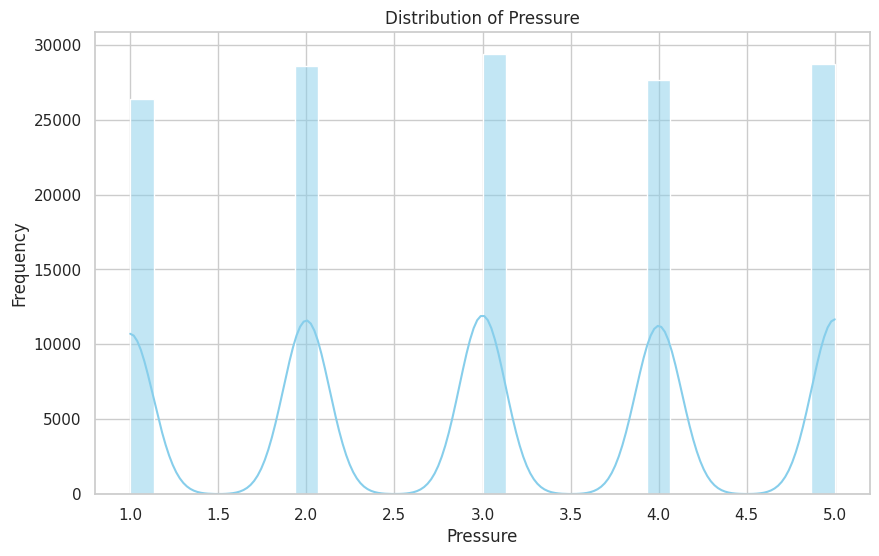

In [112]:
Pressure_data = data['Pressure'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Pressure_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.show()

In [113]:
median_Pressure = data['Pressure'].median()
data['Pressure'] = data['Pressure'].fillna(median_Pressure)

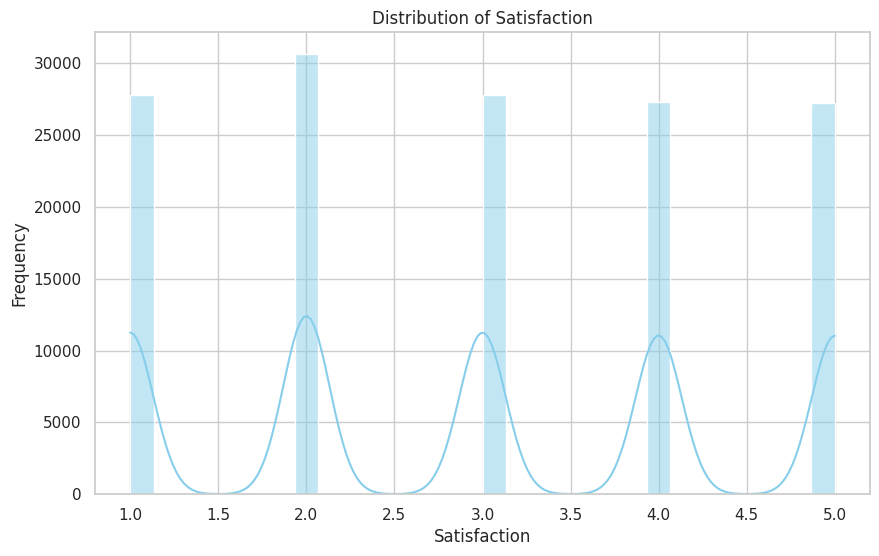

In [114]:
Satisfaction_data = data['Satisfaction'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Satisfaction_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')

plt.show()

In [115]:
median_Satisfaction = data['Satisfaction'].median()
data['Satisfaction'] = data['Satisfaction'].fillna(median_Satisfaction)

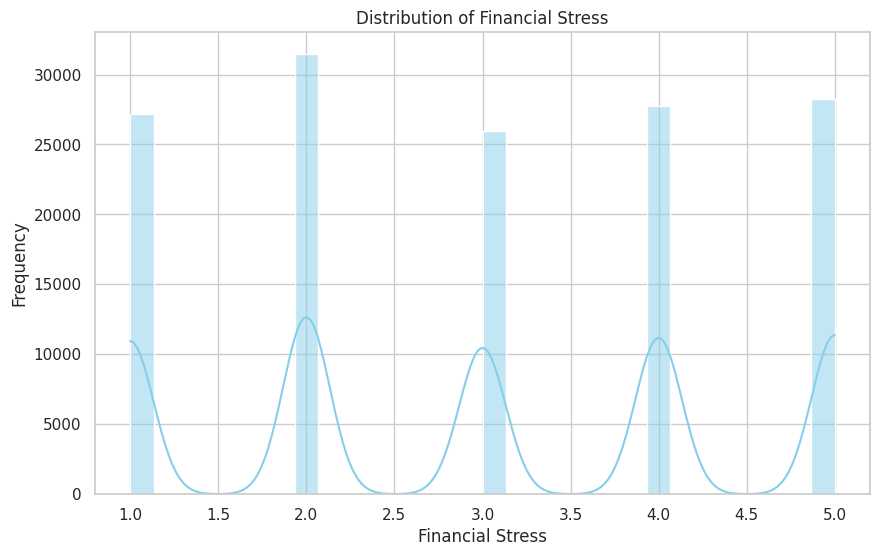

In [116]:
Financial_Stress_data = data['Financial Stress'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Financial_Stress_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')

plt.show()

In [117]:
median_Financial_Stress = data['Financial Stress'].median()
data['Financial Stress'] = data['Financial Stress'].fillna(median_Financial_Stress)

In [118]:
print(data['Dietary Habits'].unique())
print(data['Dietary Habits'].value_counts())
data['Dietary Habits'] = data['Dietary Habits'].apply(lambda x: x if x in ['Moderate', 'Unhealthy', 'Healthy'] else 'Other')

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']
Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64


In [119]:
data.shape

(140700, 18)

In [120]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                           23
Dietary Habits                            0
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Pressure                                  0
Satisfaction                              0
dtype: int64


In [121]:
data = data.dropna(axis=0)

In [122]:
data.shape

(140675, 18)

In [123]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0              Chef -1.00             9.0        Healthy      BHM   
1           Teacher -1.00             4.0      Unhealthy      LLB   
2           Student  8.97             5.5        Healthy  B.Pharm   
3           Teacher -1.00             4.0       Moderate      BBA   
4  Business Analyst -1.00             5.5      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                               No           0       5.0           2.0  
1                               No           1       4.0           3.0  
2                               No           1       5.0           2.0  
3                              Yes           1       5.0           1.0  
4                              Yes           0       1.0           1.0

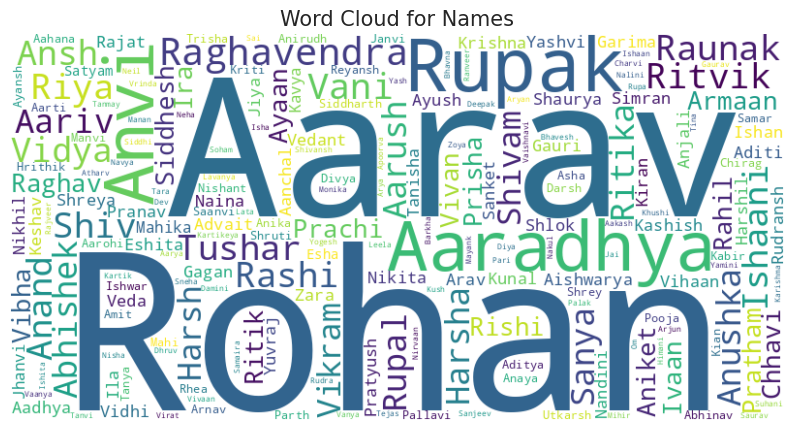

In [124]:
names_text = " ".join(data['Name'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.title("Word Cloud for Names", fontsize=15)
plt.show()


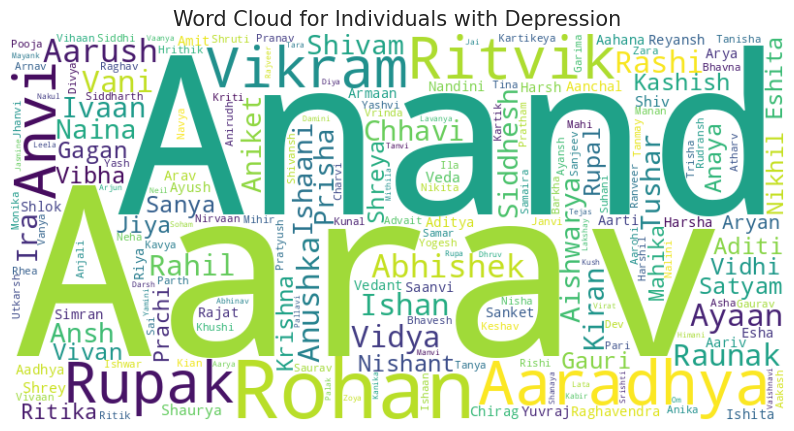

In [125]:
depressed_names = data[data['Depression'] == 1]['Name'].dropna()

names_text = " ".join(depressed_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Individuals with Depression", fontsize=15)
plt.show()

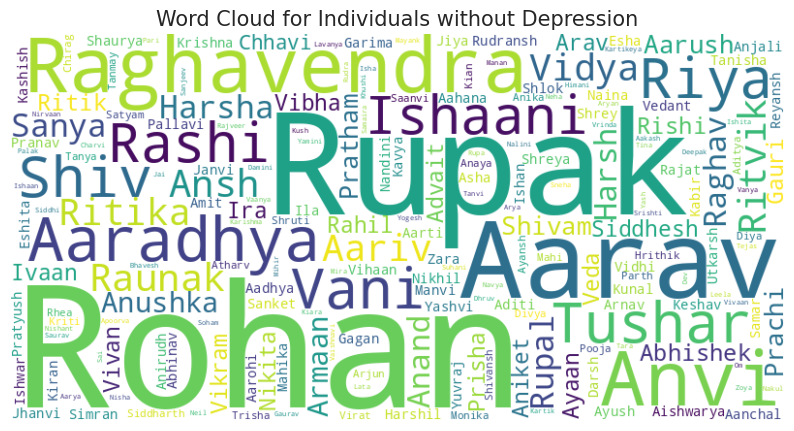

In [126]:
depressed_names = data[data['Depression'] == 0]['Name'].dropna()

names_text = " ".join(depressed_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Individuals without Depression", fontsize=15)
plt.show()

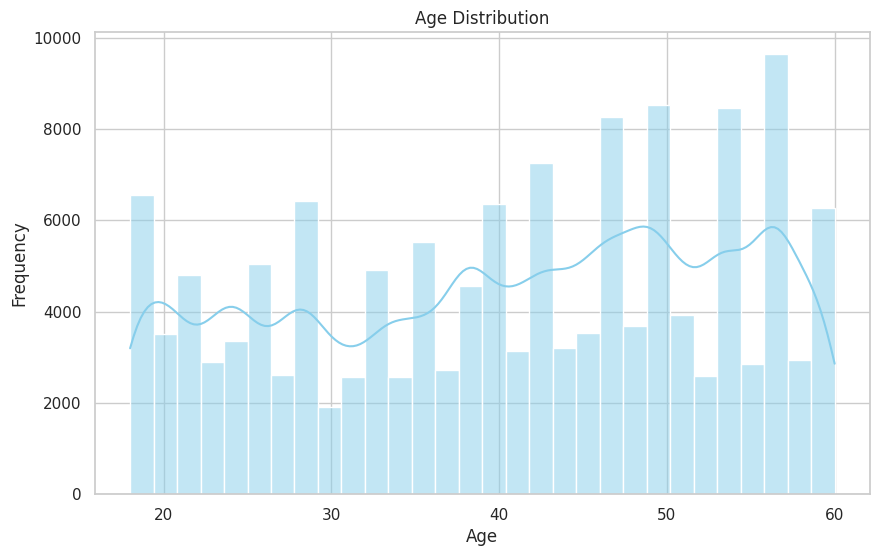

In [127]:
sns.set(style="whitegrid")

# 1. **Visualize 'Age' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

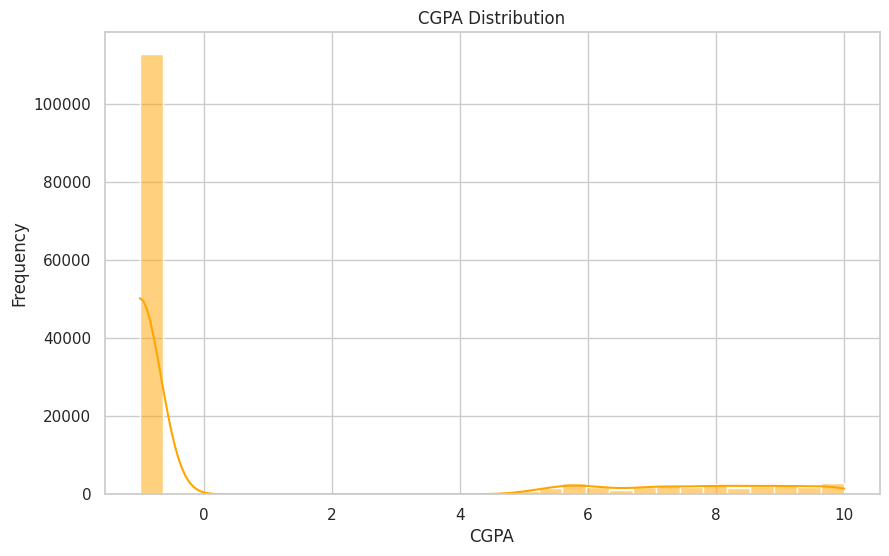

In [128]:
# 2. **Visualize 'CGPA' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['CGPA'], bins=30, kde=True, color='orange')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_299/3801413825.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




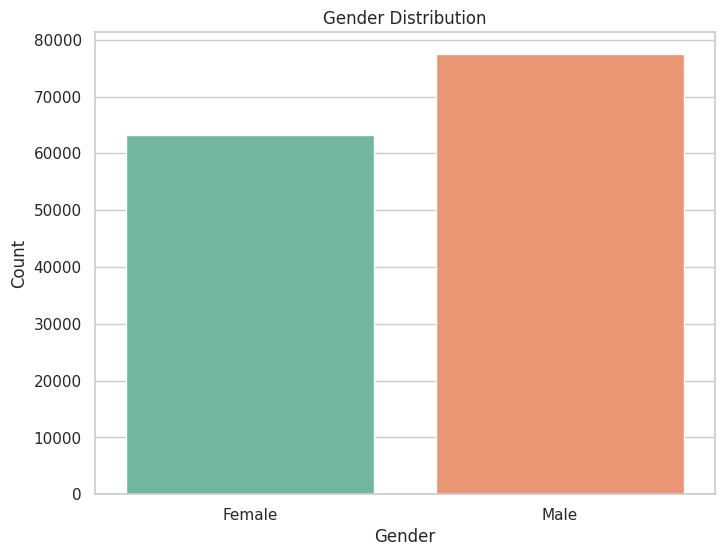

In [129]:
# 3. **Visualize 'Gender' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_299/1924059848.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




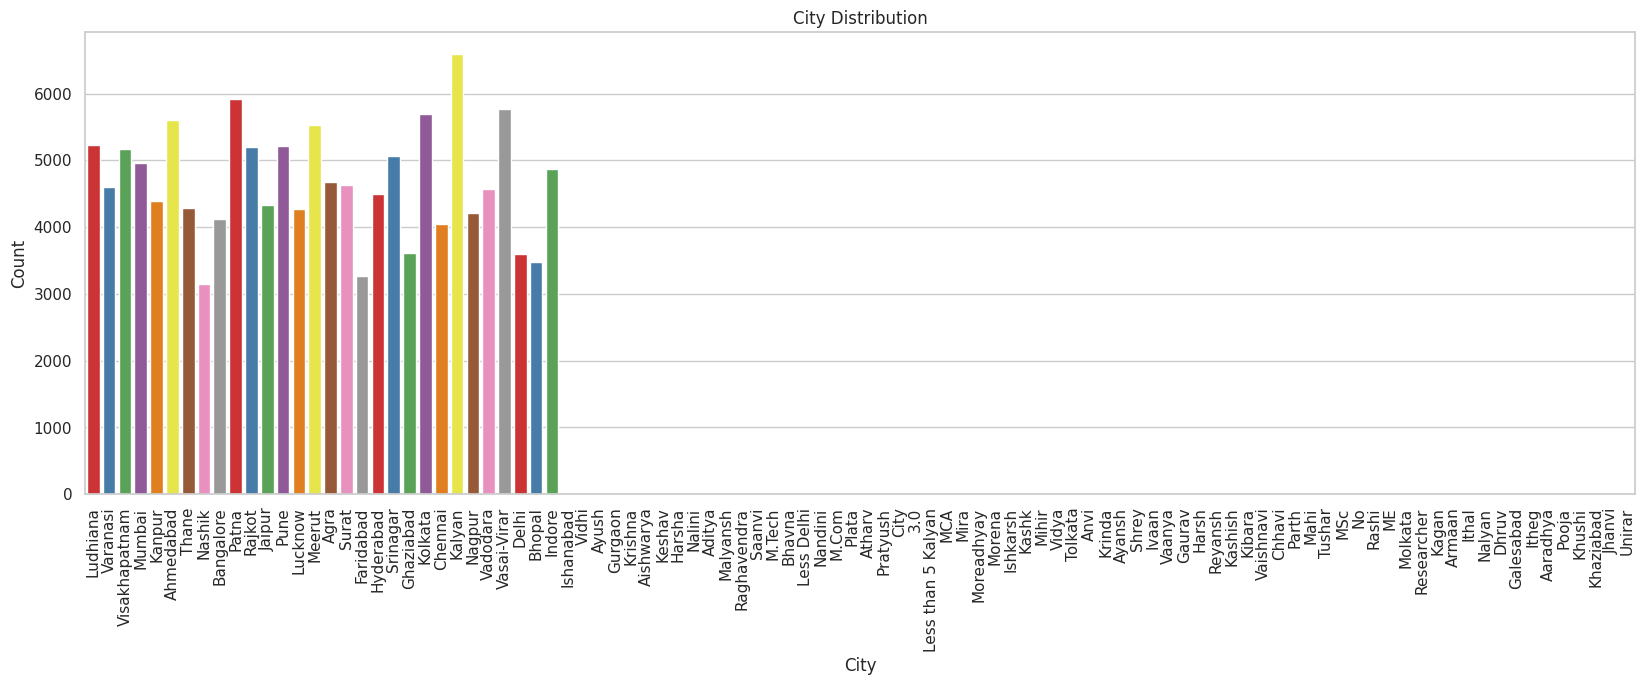

In [130]:
# 4. **Visualize 'City' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='City', data=data, palette='Set1')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_299/2058550547.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




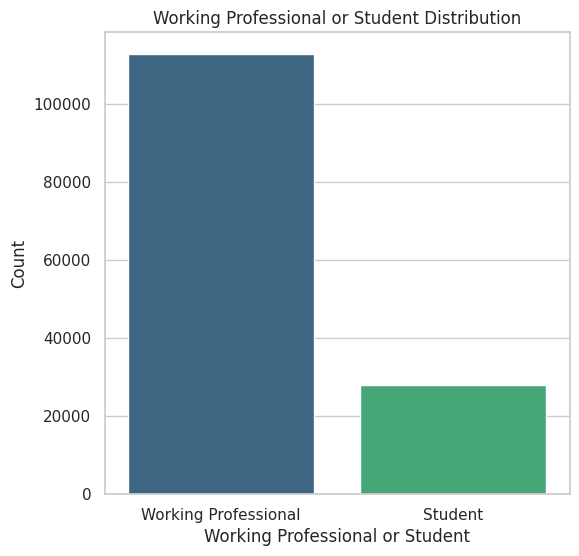

In [131]:
# 5. **Visualize 'Working Professional or Student' (Categorical)**
plt.figure(figsize=(6, 6))
sns.countplot(x='Working Professional or Student', data=data, palette='viridis')
plt.title('Working Professional or Student Distribution')
plt.xlabel('Working Professional or Student')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_299/2672961362.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




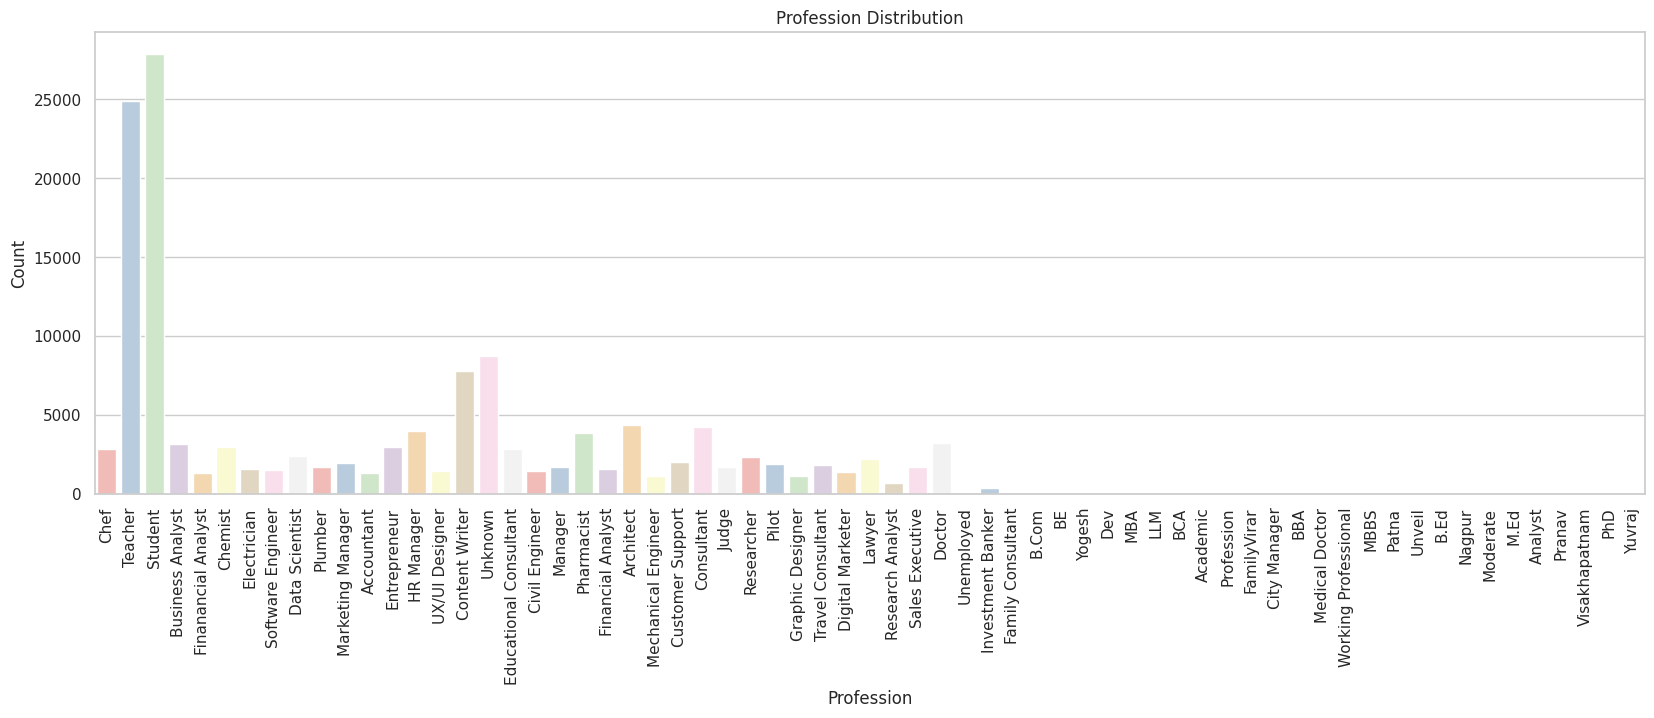

In [132]:
# 6. **Visualize 'Profession' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='Profession', data=data, palette='Pastel1')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_299/2016511778.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




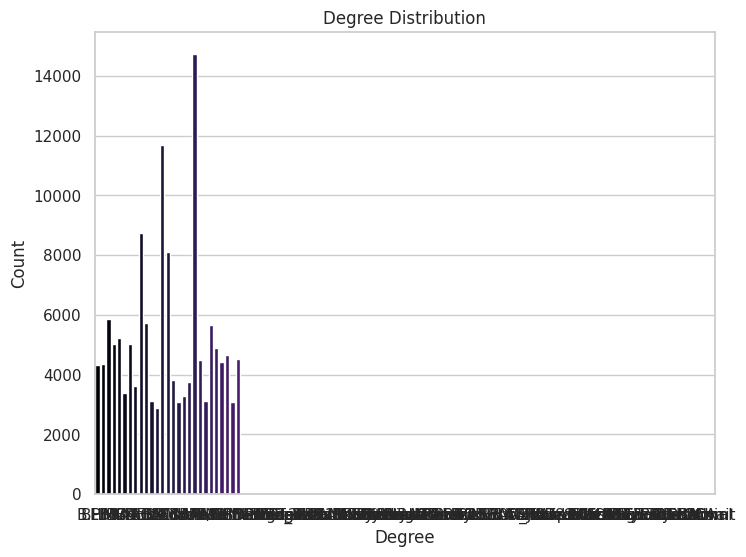

In [133]:
# 7. **Visualize 'Degree' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Degree', data=data, palette='magma')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_299/1548793077.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




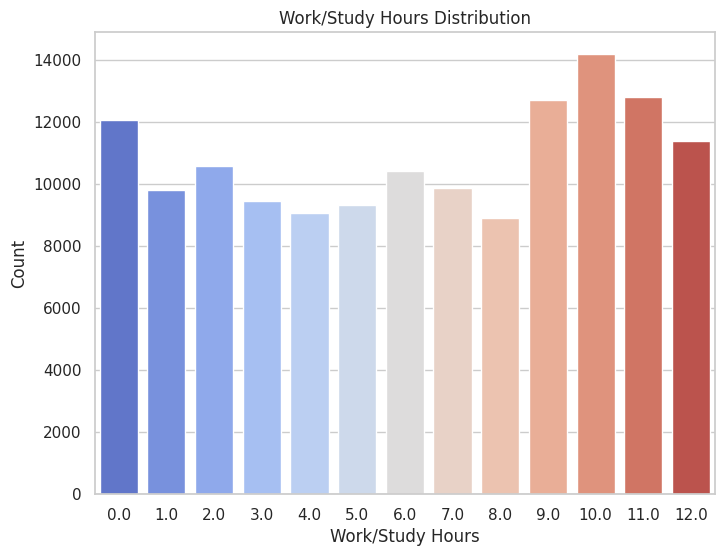

In [134]:
# 8. **Visualize 'Work/Study Hours' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Work/Study Hours', data=data, palette='coolwarm')
plt.title('Work/Study Hours Distribution')
plt.xlabel('Work/Study Hours')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_299/2818740207.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




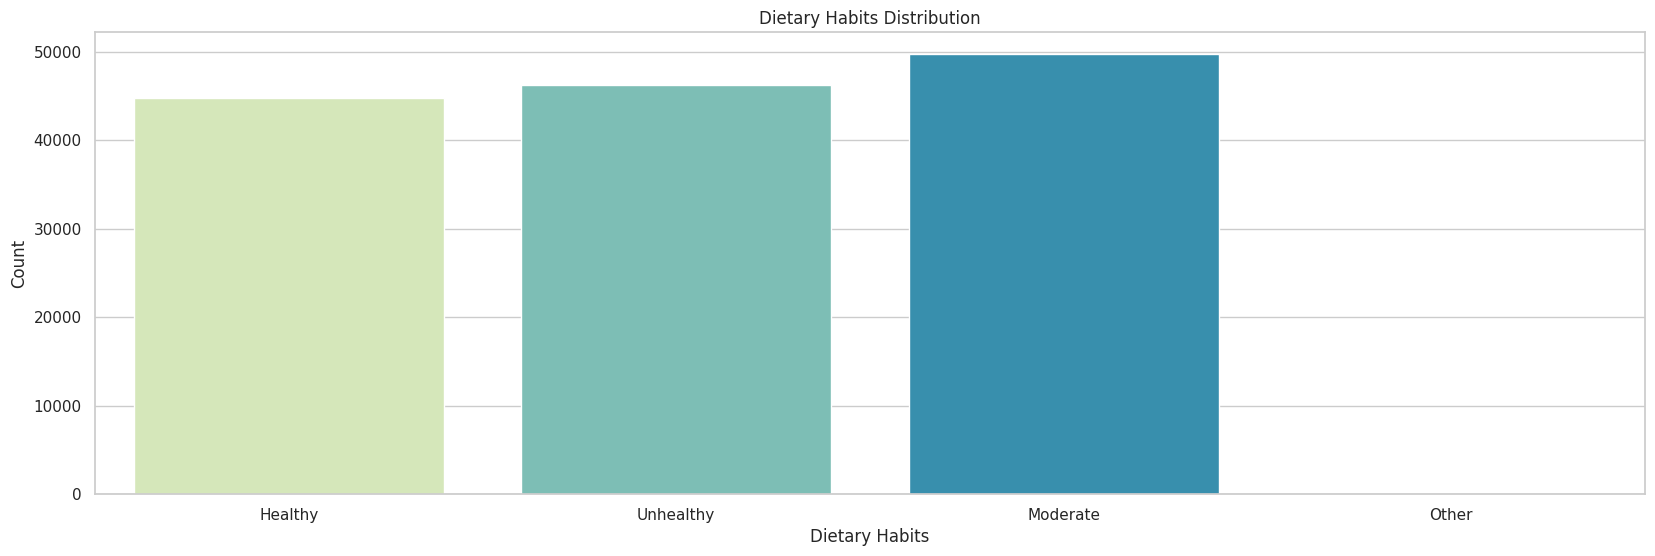

In [135]:
# 9. **Visualize 'Dietary Habits' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='Dietary Habits', data=data, palette='YlGnBu')
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

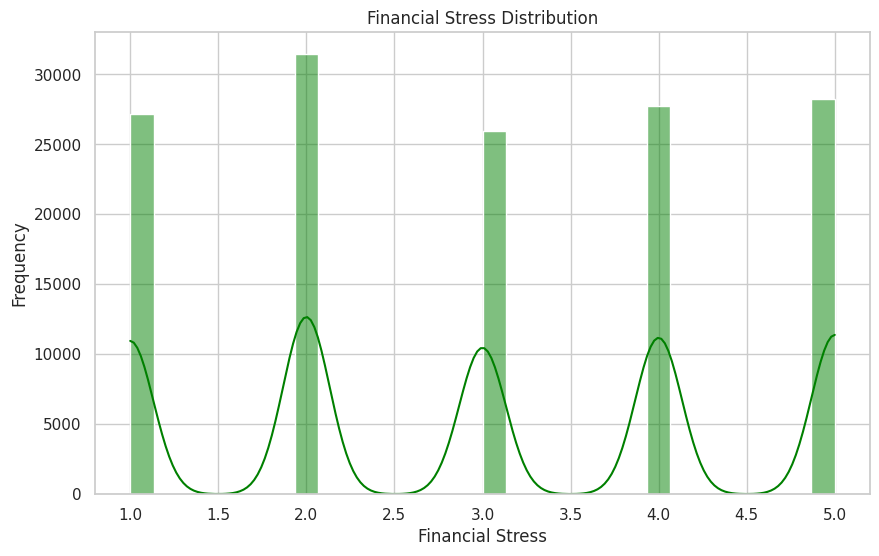

In [136]:
# 10. **Visualize 'Financial Stress' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Financial Stress'], bins=30, kde=True, color='green')
plt.title('Financial Stress Distribution')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_299/105485090.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




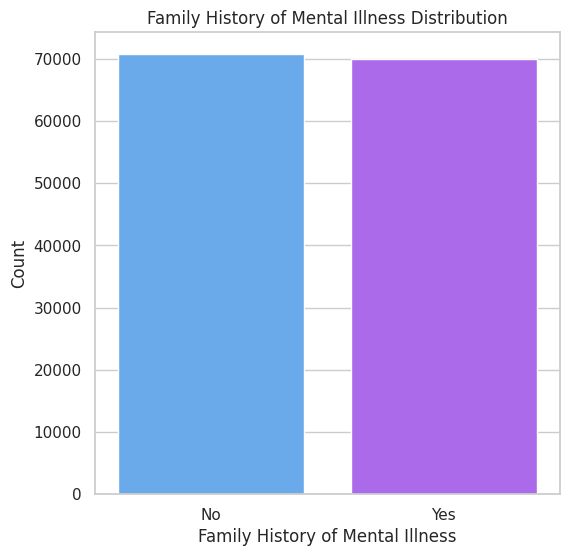

In [137]:
# 11. **Visualize 'Family History of Mental Illness' (Categorical)**
plt.figure(figsize=(6, 6))
sns.countplot(x='Family History of Mental Illness', data=data, palette='cool')
plt.title('Family History of Mental Illness Distribution')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

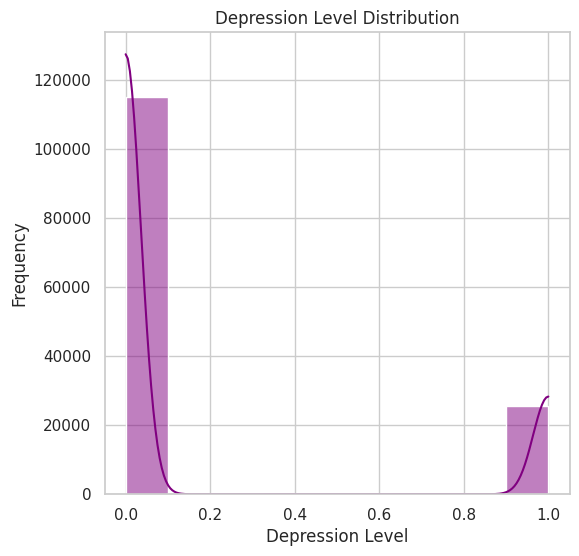

In [138]:
# 12. **Visualize 'Depression' (Numerical)**
plt.figure(figsize=(6, 6))
sns.histplot(data['Depression'], bins=10, kde=True, color='purple')
plt.title('Depression Level Distribution')
plt.xlabel('Depression Level')
plt.ylabel('Frequency')
plt.show()

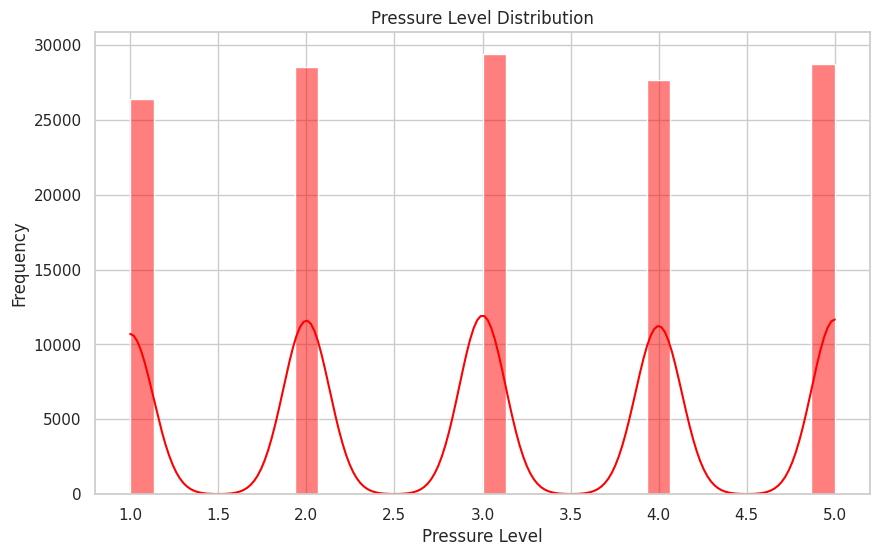

In [139]:
# 13. **Visualize 'Pressure' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Pressure'], bins=30, kde=True, color='red')
plt.title('Pressure Level Distribution')
plt.xlabel('Pressure Level')
plt.ylabel('Frequency')
plt.show()

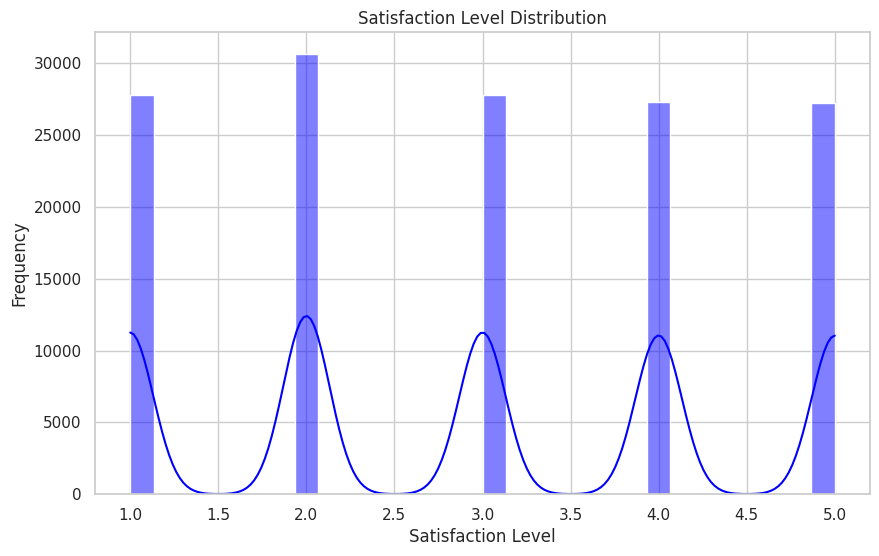

In [140]:
# 14. **Visualize 'Satisfaction' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Satisfaction'], bins=30, kde=True, color='blue')
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_299/1878335154.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




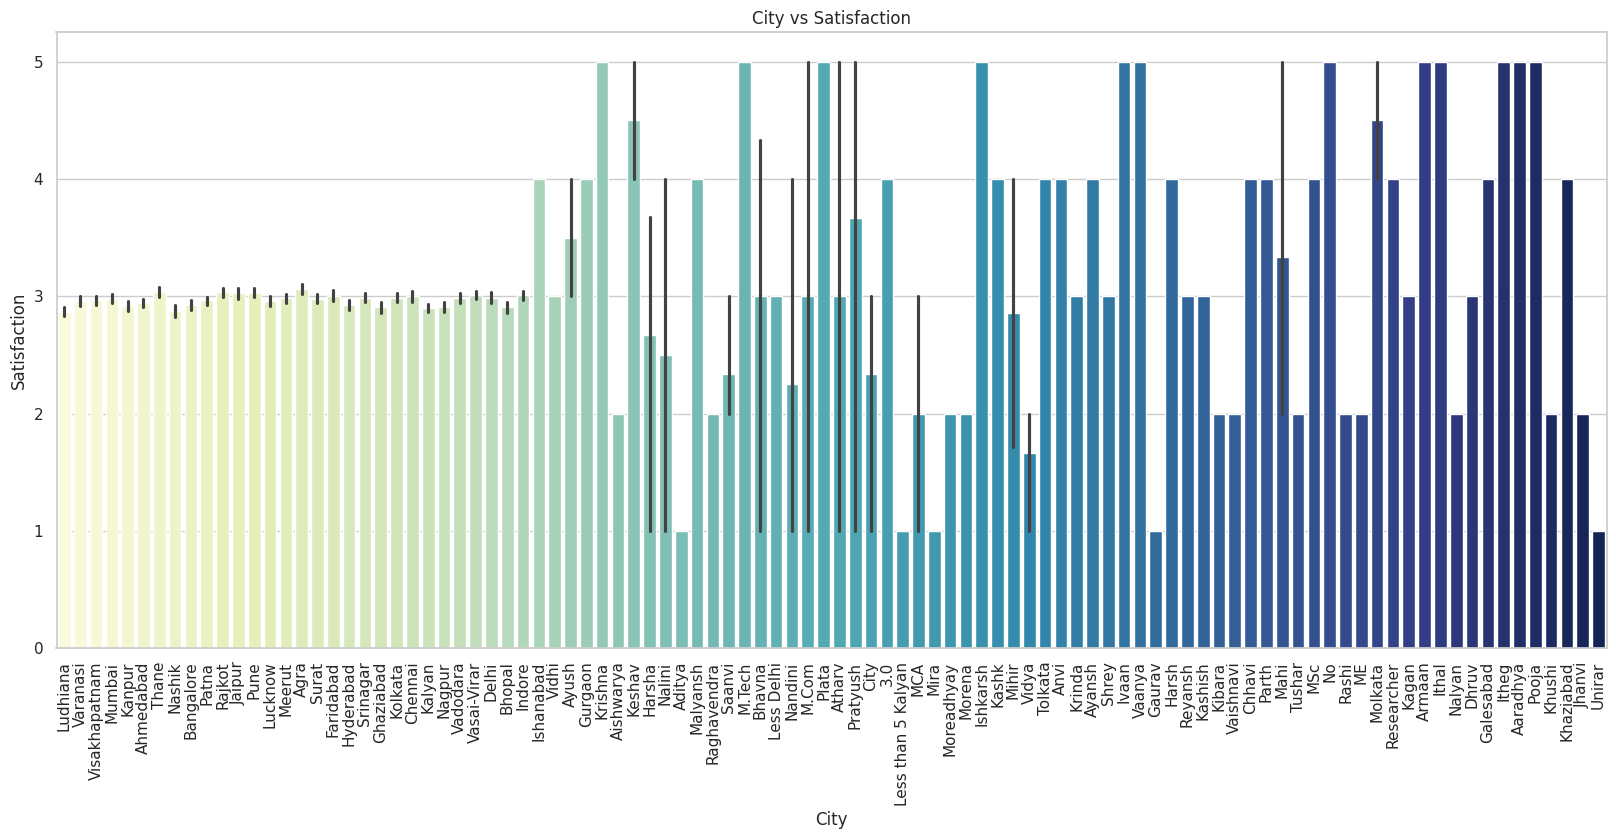

In [141]:
# 3. **Visualize relationship between 'City' and 'Satisfaction' using Bar Plot**
plt.figure(figsize=(20, 8))
sns.barplot(x='City', y='Satisfaction', data=data, palette='YlGnBu')
plt.title('City vs Satisfaction')
plt.xlabel('City')
plt.ylabel('Satisfaction')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_299/4119266797.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




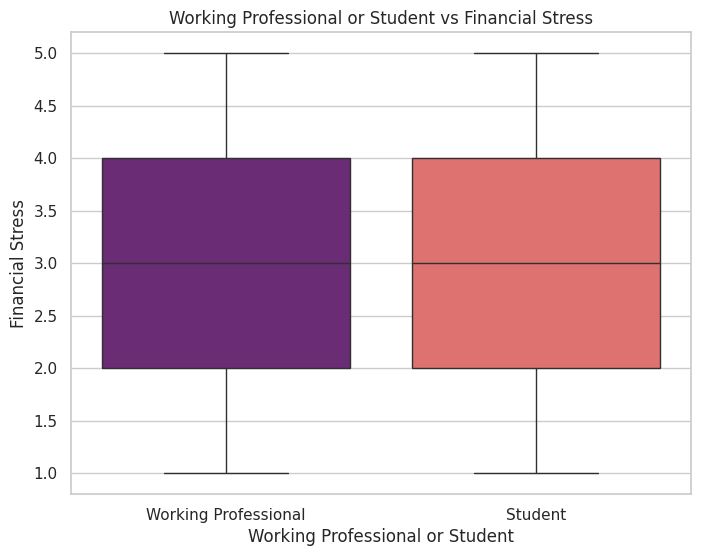

In [142]:
# 4. **Visualize relationship between 'Working Professional or Student' and 'Financial Stress' using Box Plot**
plt.figure(figsize=(8, 6))
sns.boxplot(x='Working Professional or Student', y='Financial Stress', data=data, palette='magma')
plt.title('Working Professional or Student vs Financial Stress')
plt.xlabel('Working Professional or Student')
plt.ylabel('Financial Stress')
plt.show()

/tmp/ipykernel_299/1096982051.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




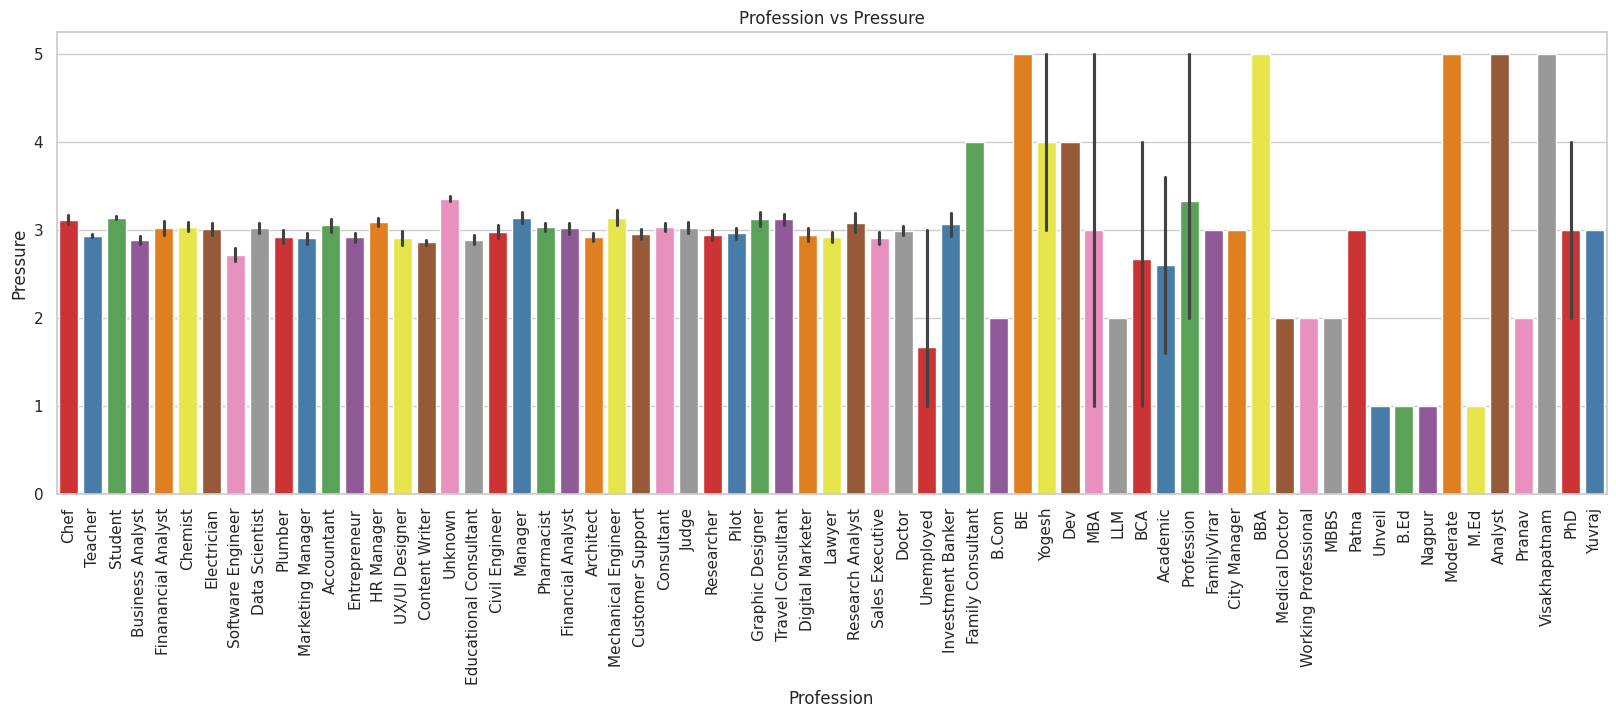

In [143]:
# 5. **Visualize relationship between 'Profession' and 'Pressure' using Bar Plot**
plt.figure(figsize=(20, 6))
sns.barplot(x='Profession', y='Pressure', data=data, palette='Set1')
plt.title('Profession vs Pressure')
plt.xlabel('Profession')
plt.ylabel('Pressure')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_299/2905521307.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




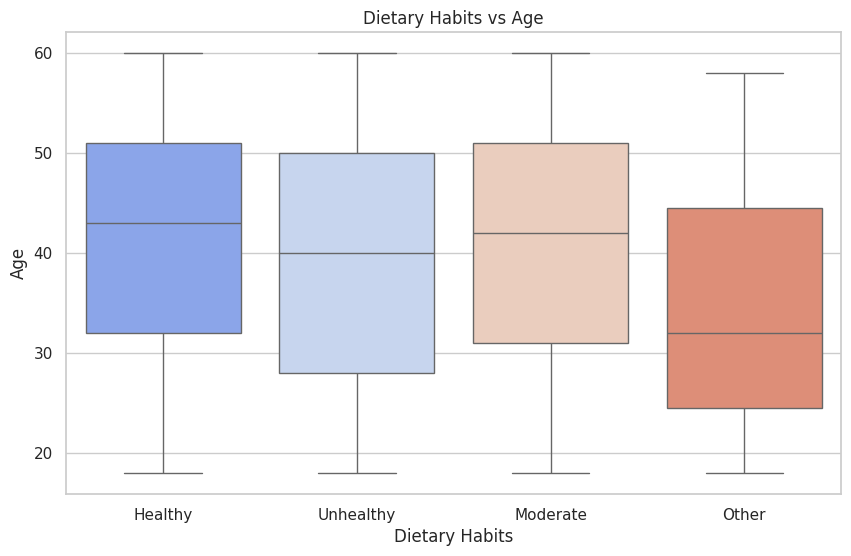

In [144]:
# 6. **Visualize relationship between 'Dietary Habits' and 'Age' using Box Plot**
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dietary Habits', y='Age', data=data, palette='coolwarm')
plt.title('Dietary Habits vs Age')
plt.xlabel('Dietary Habits')
plt.ylabel('Age')
plt.show()

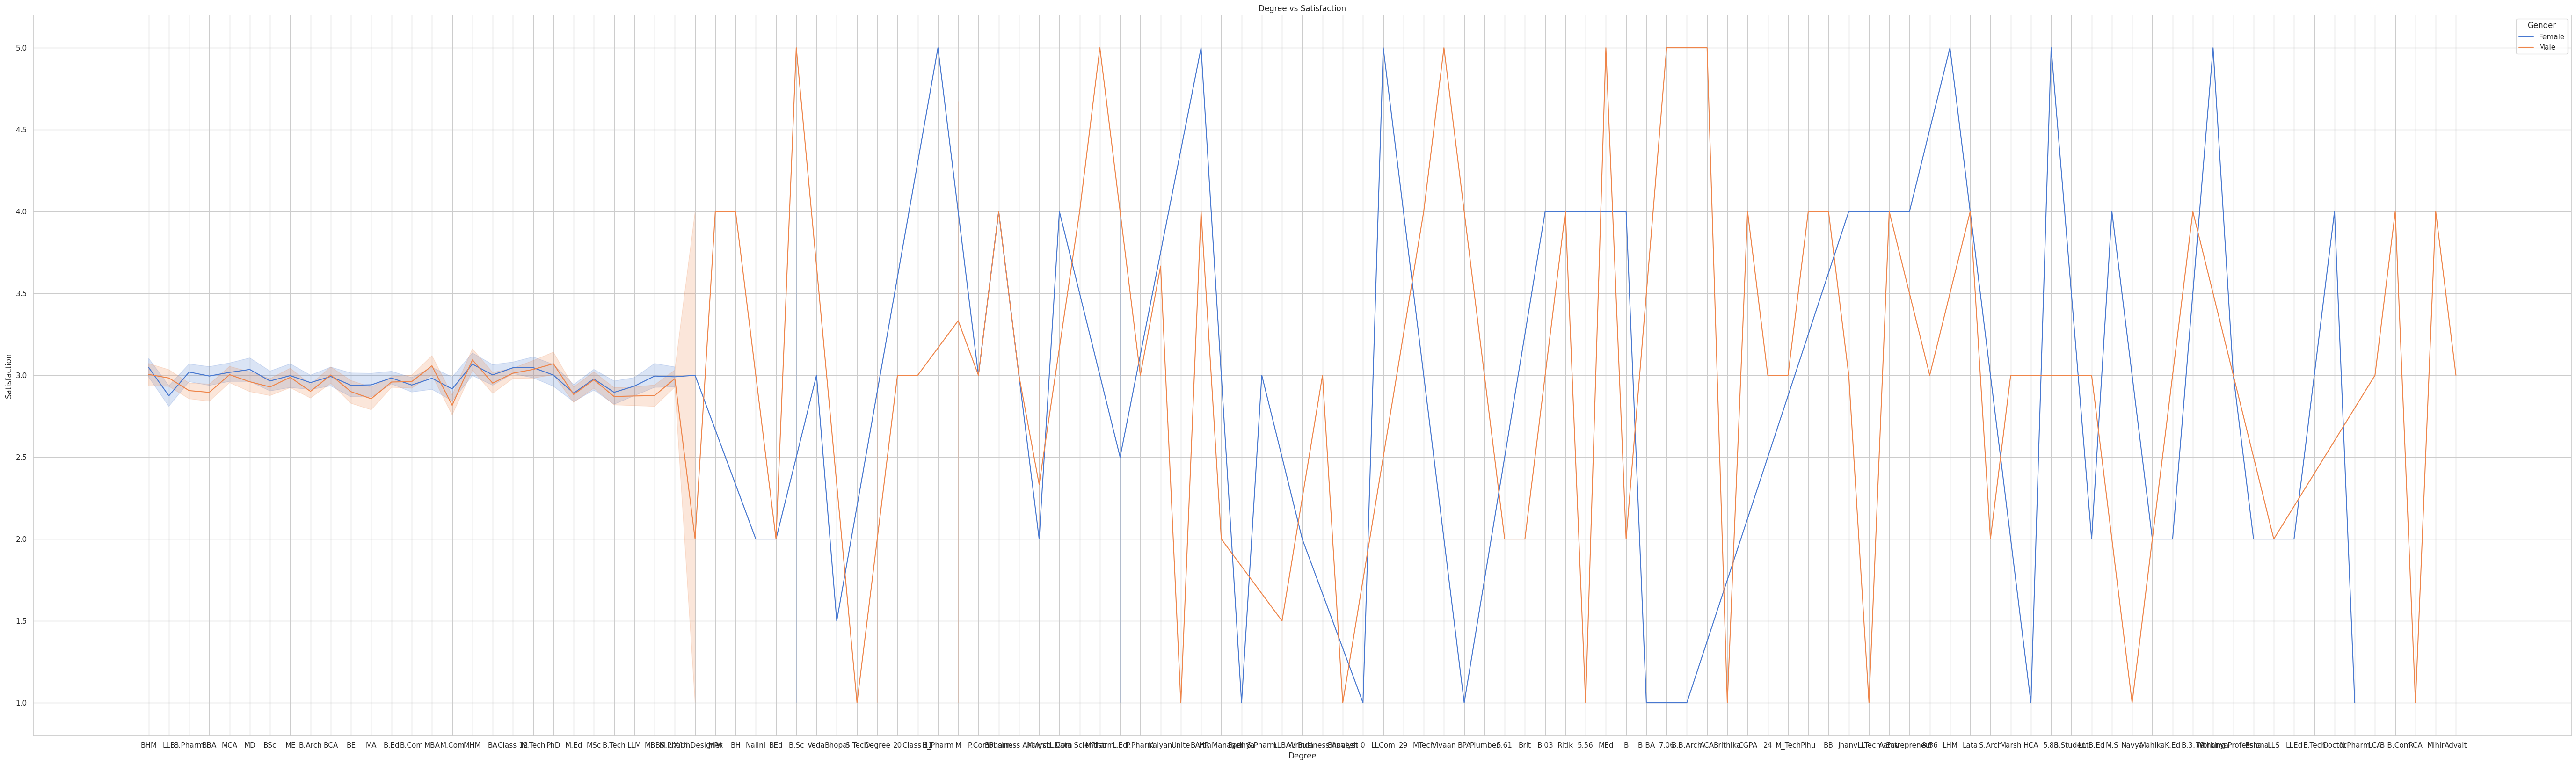

In [145]:
#**Visualize relationship between 'Degree' and 'Satisfaction' using Line Plot**
plt.figure(figsize=(70, 20))
sns.lineplot(x='Degree', y='Satisfaction', data=data, hue='Gender', palette='muted', markers=True)
plt.title('Degree vs Satisfaction')
plt.xlabel('Degree')
plt.ylabel('Satisfaction')
plt.show()

/tmp/ipykernel_299/2555148055.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




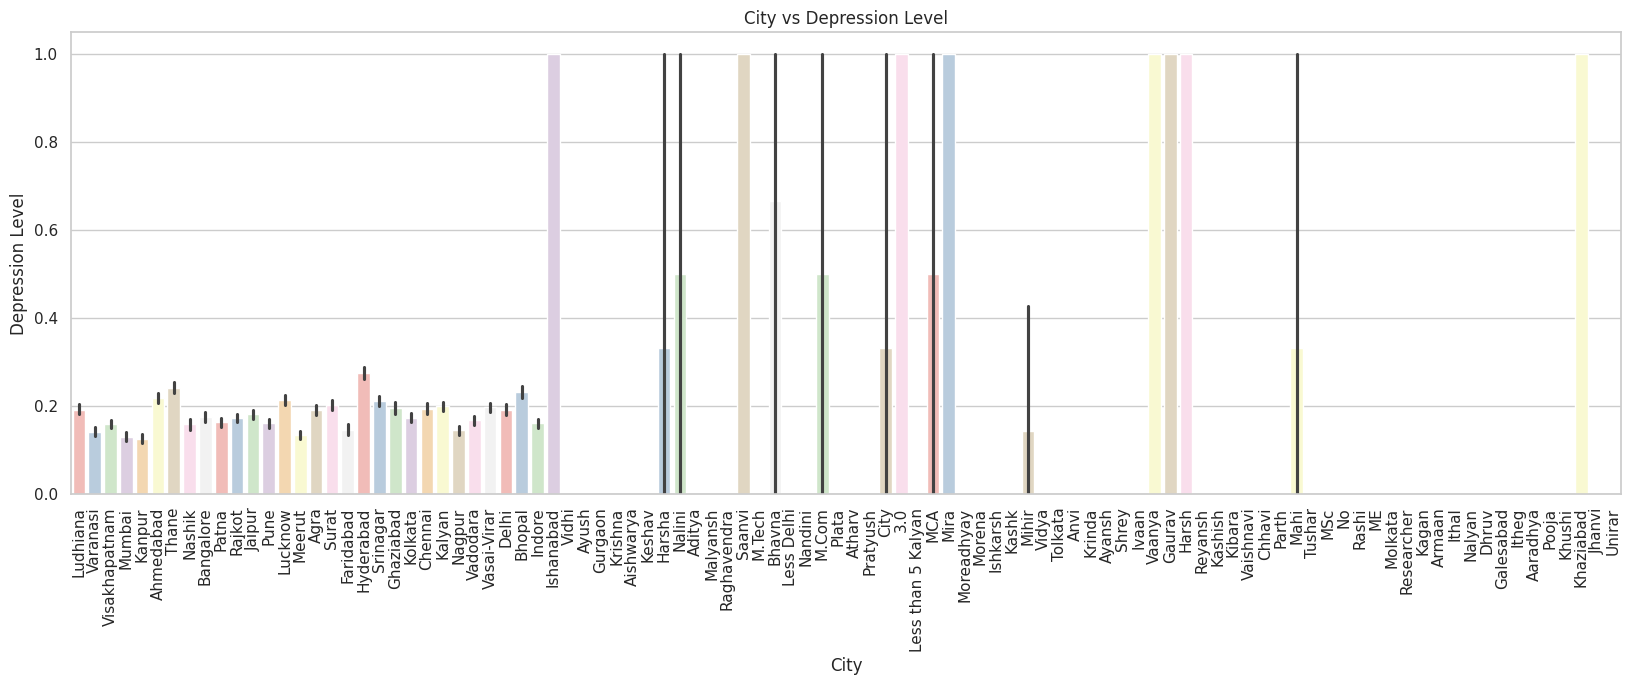

In [146]:
#**Visualize relationship between 'City' and 'Depression' using Bar Plot**
plt.figure(figsize=(20, 6))
sns.barplot(x='City', y='Depression', data=data, palette='Pastel1')
plt.title('City vs Depression Level')
plt.xlabel('City')
plt.ylabel('Depression Level')
plt.xticks(rotation=90)
plt.show()

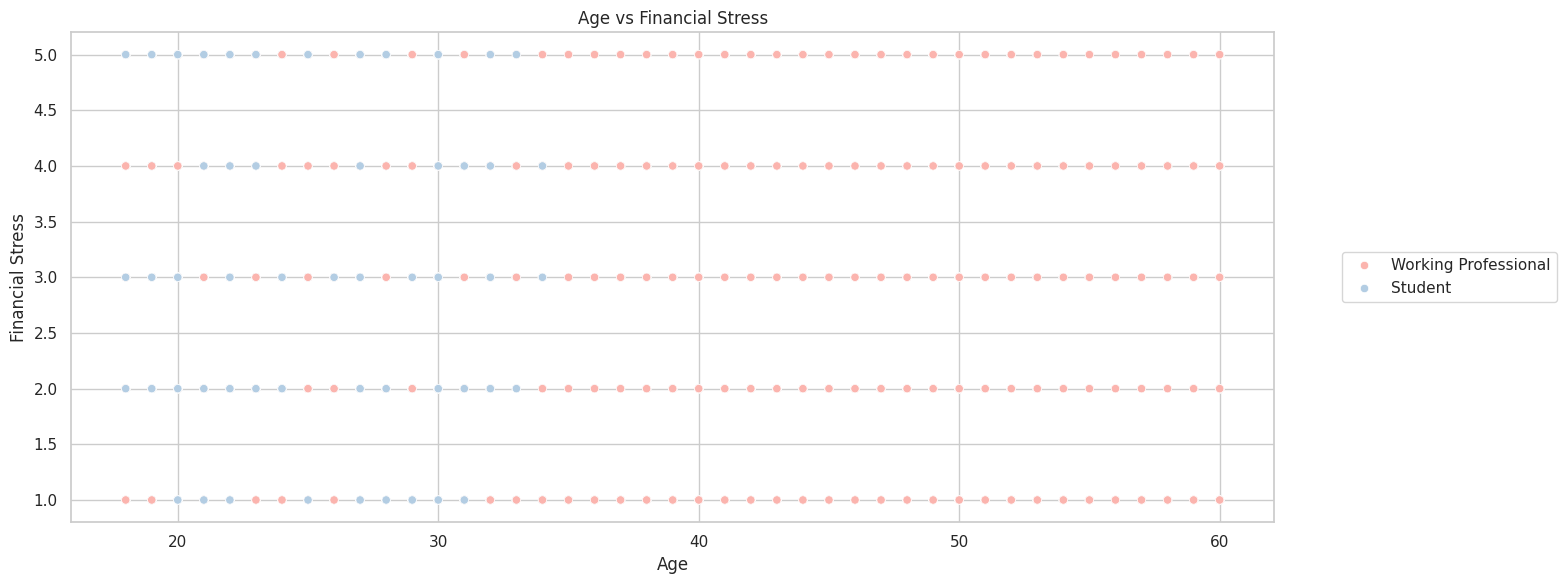

In [147]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Financial Stress', data=data, 
                hue='Working Professional or Student', palette='Pastel1')

plt.title('Age vs Financial Stress')
plt.xlabel('Age')
plt.ylabel('Financial Stress')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])  # Adjust layout

plt.show()

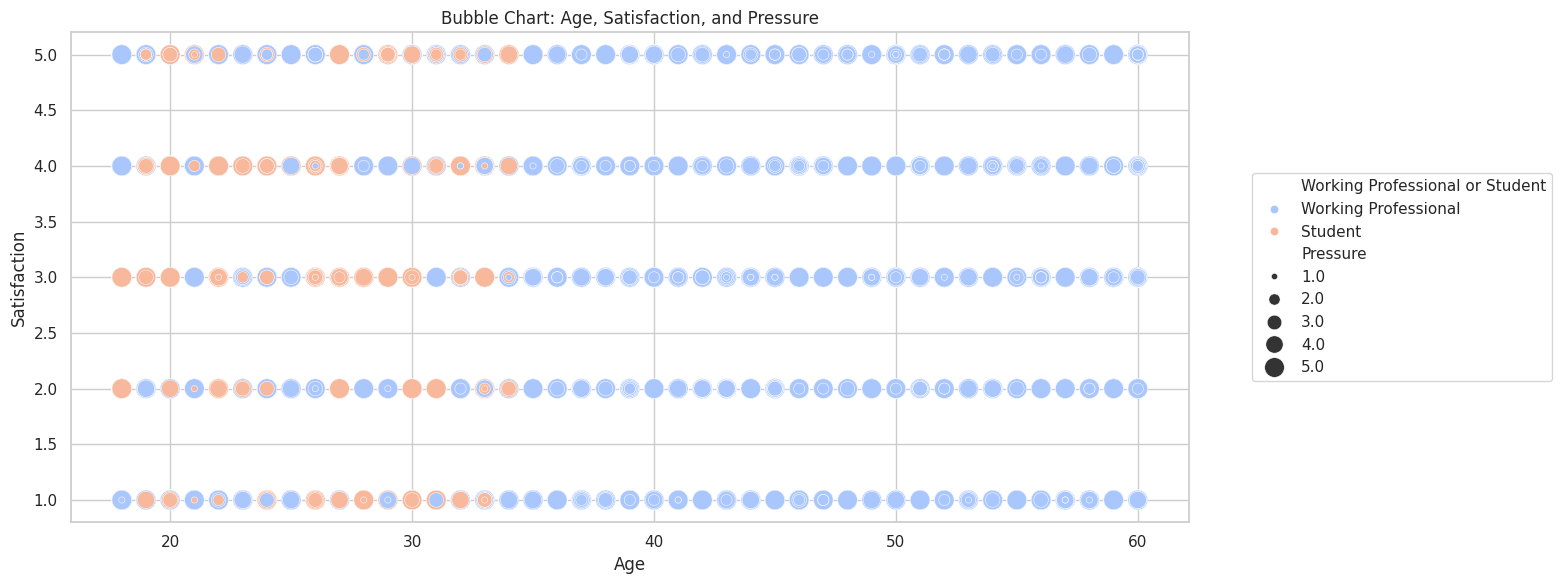

In [148]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Satisfaction', size='Pressure', data=data, 
                hue='Working Professional or Student', palette='coolwarm', 
                sizes=(20, 200))

plt.title('Bubble Chart: Age, Satisfaction, and Pressure')
plt.xlabel('Age')
plt.ylabel('Satisfaction')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])  # Adjust layout

plt.show()

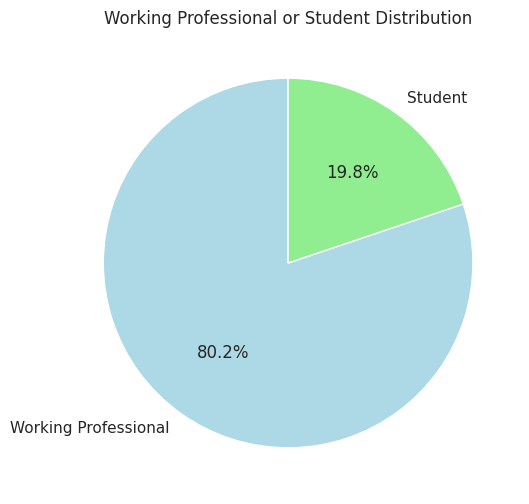

In [149]:
# 11. **Pie Chart for 'Working Professional or Student' distribution**
plt.figure(figsize=(6, 6))
data['Working Professional or Student'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Working Professional or Student Distribution')
plt.ylabel('')
plt.show()

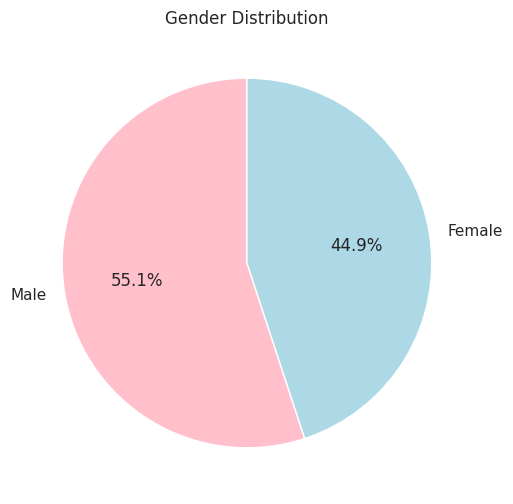

In [150]:
# 12. **Pie Chart for 'Gender' distribution**
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


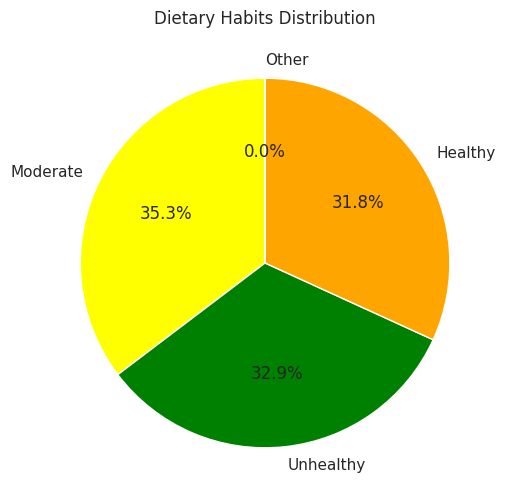

In [151]:
# 13. **Pie Chart for 'Dietary Habits' distribution**
plt.figure(figsize=(6, 6))
data['Dietary Habits'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['yellow', 'green', 'orange'])
plt.title('Dietary Habits Distribution')
plt.ylabel('')
plt.show()

In [152]:
# Initialize geolocator
geolocator = Nominatim(user_agent="city_map")

def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
        else:
            print(f"City not found: {city}")
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None


In [153]:
m = folium.Map(location=[20.5937, 78.9629], zoom_start=2)

#for city in data['City'].unique():
#    latitude, longitude = get_coordinates(city)
#    if latitude and longitude:
#       folium.Marker([latitude, longitude], popup=city).add_to(m)
#m.save('city_distribution_map.html')
    
#m


In [154]:
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_299/1189945905.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [155]:
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_299/3826937041.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [156]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Depression', 'Suicidal Thoughts'])
fig.add_trace(go.Bar(x=data['Depression'].value_counts().index, y=data['Depression'].value_counts()), row=1, col=1)
fig.add_trace(go.Bar(x=data['Have you ever had suicidal thoughts ?'].value_counts().index, y=data['Have you ever had suicidal thoughts ?'].value_counts()), row=1, col=2)
fig.update_layout(title='Target Variable Distribution')
fig.show()

In [157]:
fig = px.imshow(pd.crosstab(data['Gender'], data['Depression']), text_auto=True)
fig.update_layout(title='Gender vs Depression')
fig.show()

fig = px.imshow(pd.crosstab(data['Gender'], data['Have you ever had suicidal thoughts ?']), text_auto=True)
fig.update_layout(title='Gender vs Suicidal thoughts ?')
fig.show()

fig = px.imshow(pd.crosstab(data['Working Professional or Student'], data['Depression']), text_auto=True)
fig.update_layout(title='Profession vs Depression')
fig.show()

fig = px.imshow(pd.crosstab(data['Working Professional or Student'], data['Have you ever had suicidal thoughts ?']), text_auto=True)
fig.update_layout(title='Profession vs Suicidal Thoughts')
fig.show()

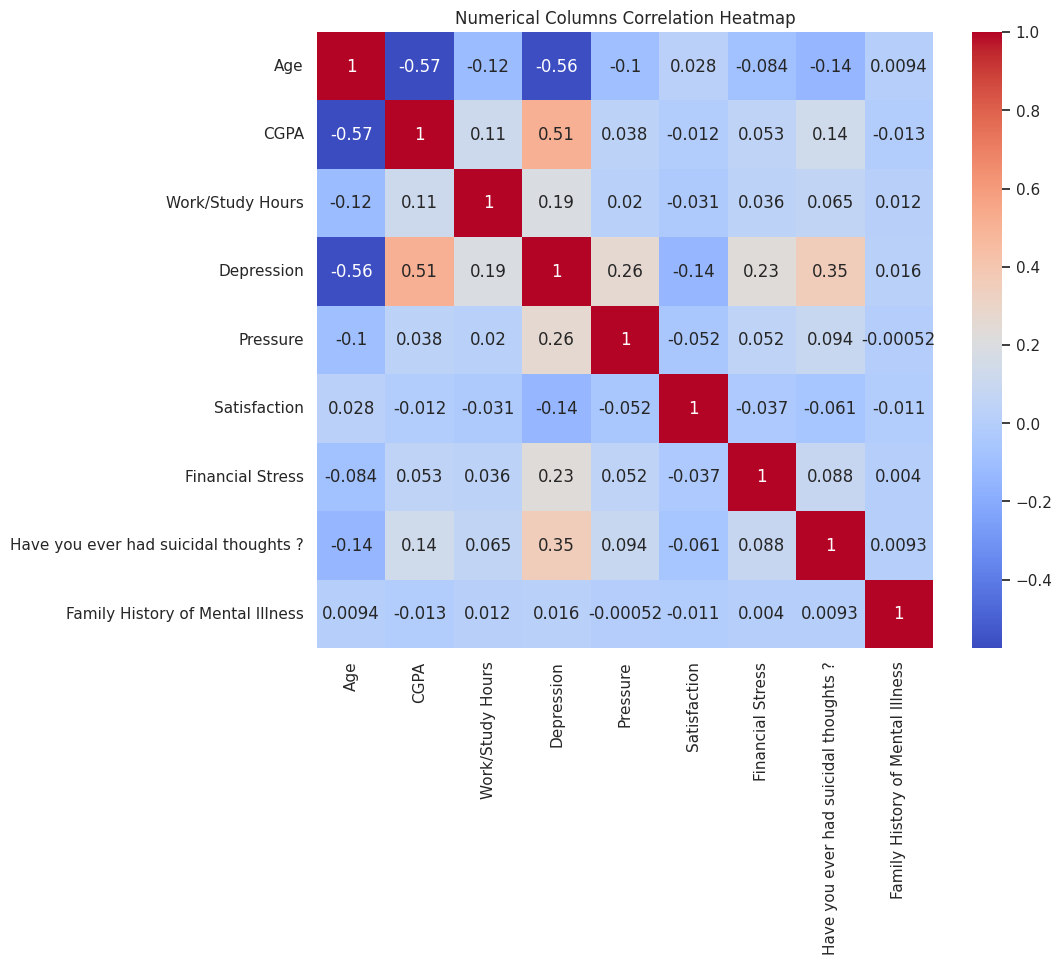

Correlation with Depression:
Depression                               1.000000
CGPA                                     0.514050
Have you ever had suicidal thoughts ?    0.349082
Pressure                                 0.263454
Financial Stress                         0.227249
Work/Study Hours                         0.191739
Family History of Mental Illness         0.016452
Satisfaction                            -0.142390
Age                                     -0.564665
Name: Depression, dtype: float64


In [158]:
numerical_cols = ['Age','CGPA', 'Work/Study Hours', 'Depression', 'Pressure', 'Satisfaction' ,'Financial Stress','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
data_num = data[numerical_cols]

corr_matrix = data_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Numerical Columns Correlation Heatmap')
plt.show()

target_corr = corr_matrix['Depression'].sort_values(ascending=False)
print("Correlation with Depression:")
print(target_corr)


In [159]:
data.drop(columns=['id', 'Name'], inplace=True)

In [160]:
data.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'CGPA', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Pressure', 'Satisfaction'],
      dtype='object')

In [161]:
X = data.drop(['Depression', 'City', 'Working Professional or Student',
               'Profession', 'CGPA', 'Sleep Duration', 
               'Dietary Habits', 'Degree','Gender'], axis=1)

y = data['Depression']

In [162]:
X = data.drop(['Depression', 'City', 'Working Professional or Student',
               'Profession', 'CGPA', 'Sleep Duration', 
               'Dietary Habits', 'Degree','Gender'], axis=1)

y = data['Depression']

# Use only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

In [163]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# Initialize and train the SVM model
#svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel, regularization parameter C
#svm_model.fit(X_train, y_train)

# Make predictions
#y_pred = svm_model.predict(X_test)

In [165]:
# Evaluate the model
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [168]:
data.head(10)

Gender   Age           City Working Professional or Student  \
0  Female  49.0       Ludhiana            Working Professional   
1    Male  26.0       Varanasi            Working Professional   
2    Male  33.0  Visakhapatnam                         Student   
3    Male  22.0         Mumbai            Working Professional   
4  Female  30.0         Kanpur            Working Professional   
5  Female  59.0      Ahmedabad            Working Professional   
6    Male  47.0          Thane            Working Professional   
7    Male  38.0         Nashik            Working Professional   
8  Female  24.0      Bangalore                         Student   
9  Female  42.0          Patna            Working Professional   

            Profession  CGPA  Sleep Duration Dietary Habits   Degree  \
0                 Chef -1.00             9.0        Healthy      BHM   
1              Teacher -1.00             4.0      Unhealthy      LLB   
2              Student  8.97             5.5        Healthy  B.Pharm   
3              Teacher -1.00             4.0       Moderate      BBA   
4     Business Analyst -1.00             5.5      Unhealthy      BBA   
5  Finanancial Analyst -1.00             5.5        Healthy      MCA   
6              Chemist -1.00             7.5       Moderate       MD   
7              Teacher -1.00             7.5      Unhealthy  B.Pharm   
8              Student  5.90             5.5       Moderate      BSc   
9          Electrician -1.00             5.5        Healthy       ME   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      0               1.0               2.0   
1                                      1               7.0               3.0   
2                                      1               3.0               1.0   
3                                      1              10.0               1.0   
4                                      1               9.0               4.0   
5                                      0               7.0               5.0   
6                                      0               6.0               2.0   
7                                      0              10.0               3.0   
8                                      0               3.0               2.0   
9                                      1               7.0               2.0   

   Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                                 0           0       5.0           2.0  
1                                 0           1       4.0           3.0  
2                                 0           1       5.0           2.0  
3                                 1           1       5.0           1.0  
4                                 1           0       1.0           1.0  
5                                 0           0       2.0           5.0  
6                                 0           0       5.0           2.0  
7                                 1           0       3.0           4.0  
8                                 1           0       2.0           5.0  
9                                 1           0       4.0           1.0